In [2]:
# import the library
import numpy as np 
import scipy.linalg as LA
import matplotlib.pyplot as plt 
from sklearn.datasets import olivetti_faces
np.random.seed(0)

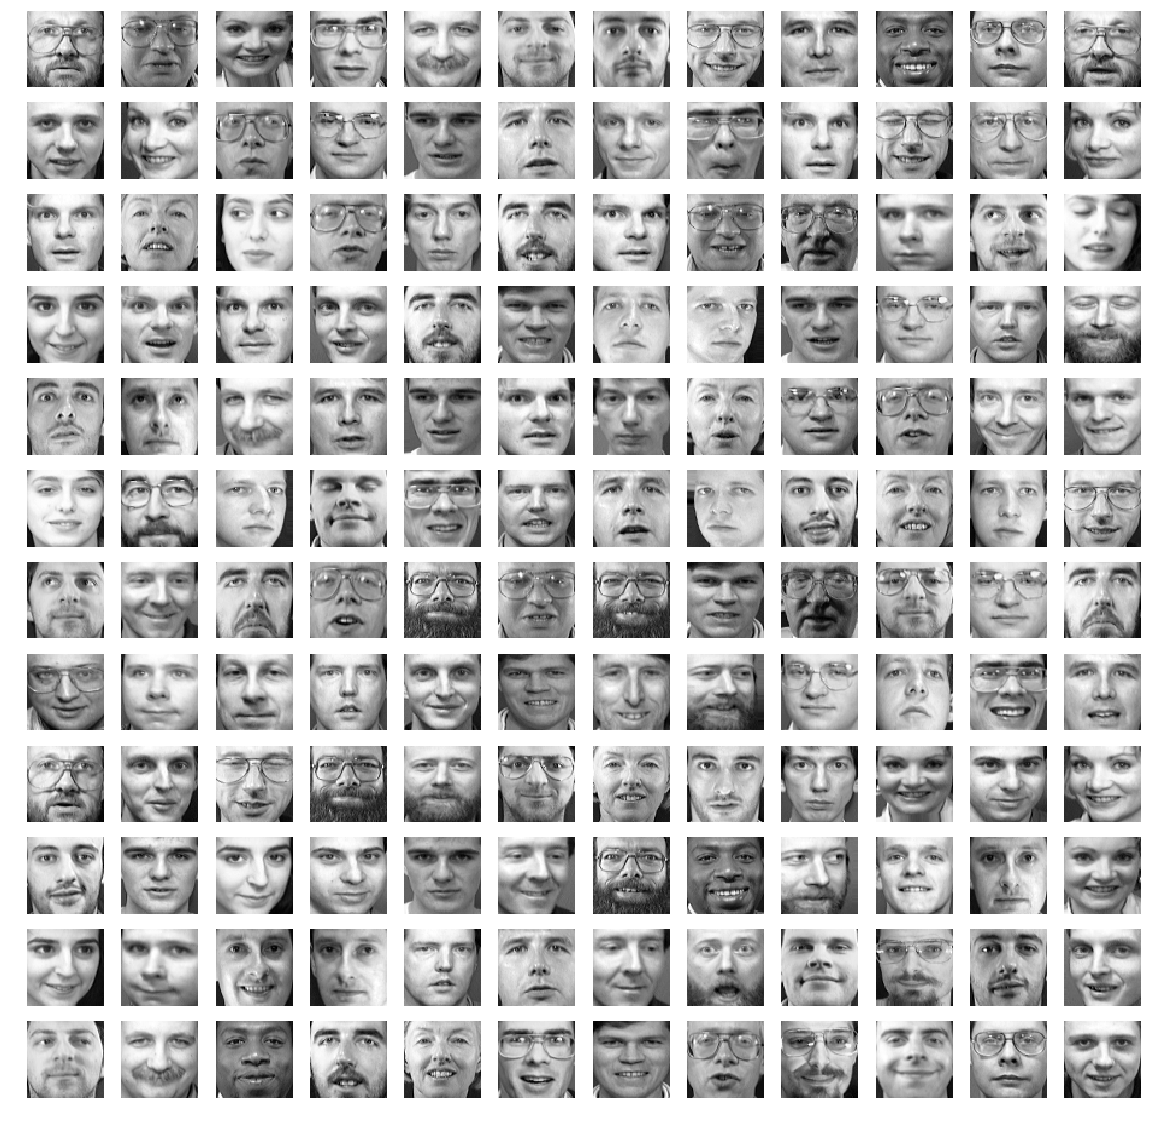

In [3]:
# import data shuffle and view some of the data
face_data = olivetti_faces.fetch_olivetti_faces().data
idx = np.random.permutation(len(face_data))
face_data = face_data[idx]

fig=plt.figure(figsize=(20, 20))
columns = 12; rows = 12
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(face_data[i-1].reshape(64,64),cmap='gray')
    plt.axis('off')
plt.show()

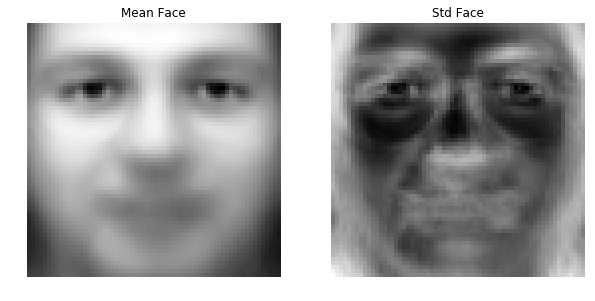

In [4]:
# see the mean face per dimension as well as std face
mean_face = face_data.mean(0); std_face = face_data.std(0)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(mean_face.reshape(64,64),cmap='gray')
plt.axis('off')
plt.title("Mean Face")

plt.subplot(122)
plt.imshow(std_face.reshape(64,64),cmap='gray')
plt.axis('off')
plt.title("Std Face")

plt.show()

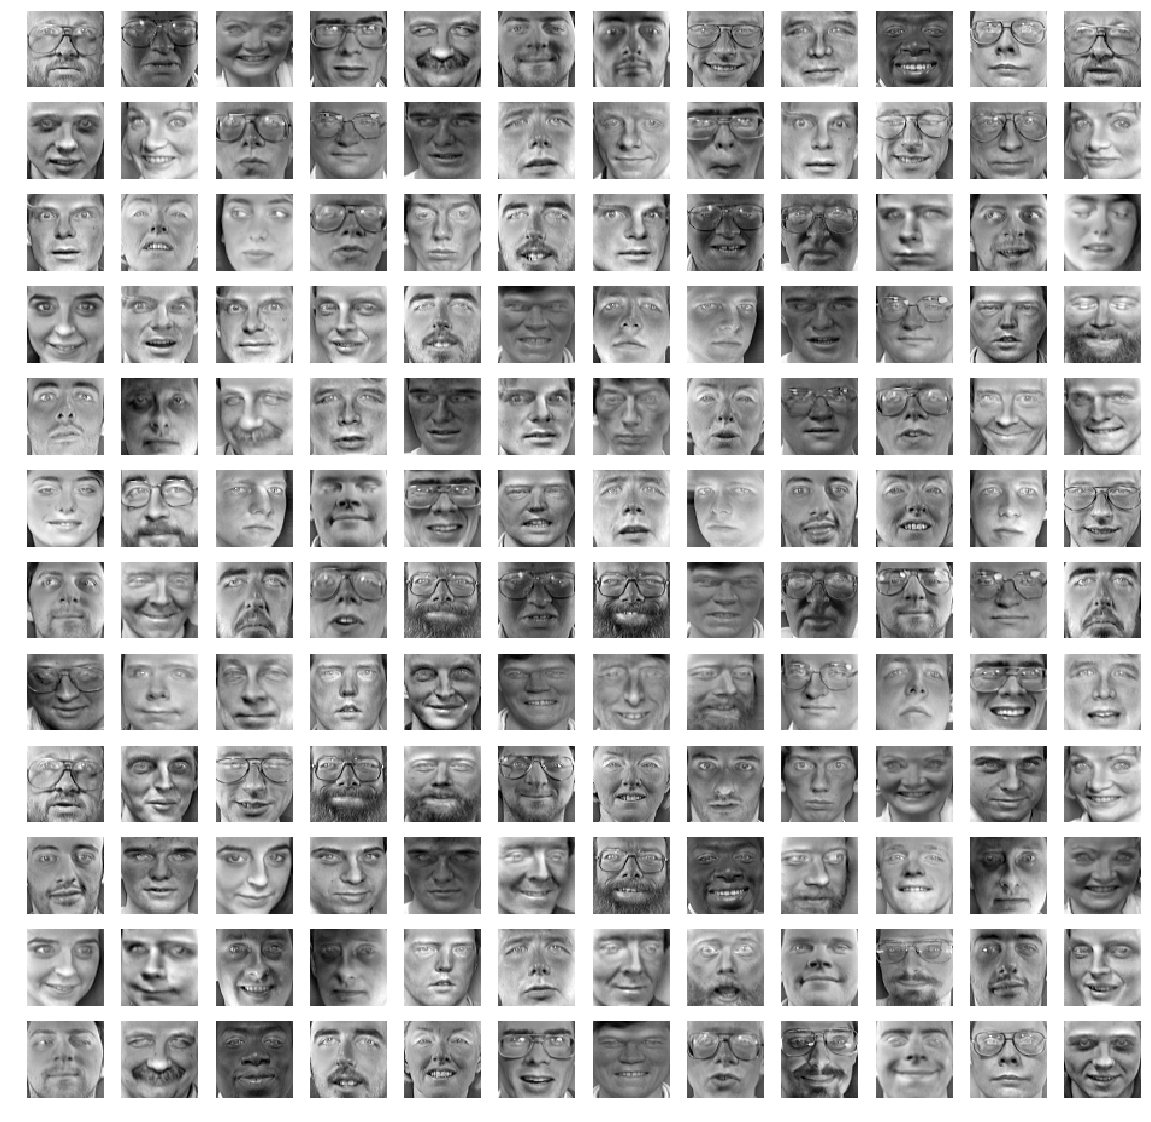

In [5]:
# View the mean subtracted images
normalized_face_data = face_data - mean_face
fig=plt.figure(figsize=(20, 20))
columns = 12; rows = 12
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(normalized_face_data[i-1].reshape(64,64),cmap='gray')
    plt.axis('off')
plt.show()

In [44]:
# perform SVD
U,s,V = LA.svd(normalized_face_data.T,full_matrices=False)
print(U.shape)
print(s.shape)
print(V.shape)

(4096, 400)
(400,)
(400, 400)


0.13880798 0.13880798 1.7351792e-07
1.6391277e-09 3.9712178e-10 1.8084054e-09


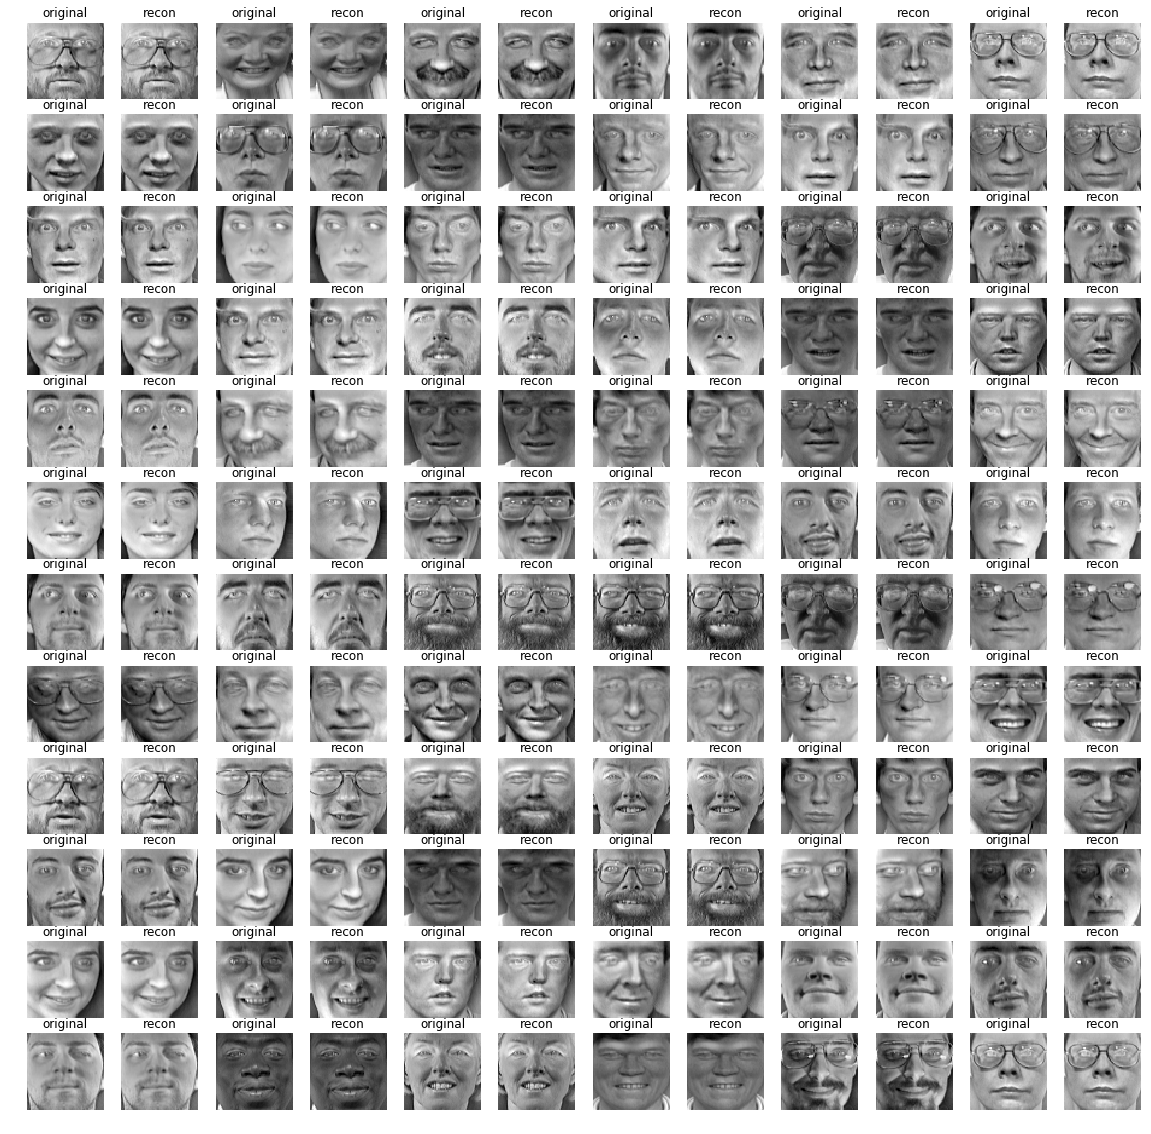

In [46]:
# reconstruct the original image 
recon_image = U @ np.diag(s) @ V
recon_image = recon_image.T
print(np.std(normalized_face_data), np.std(recon_image), np.std(normalized_face_data - recon_image))
print(np.mean(normalized_face_data), np.mean(recon_image), np.mean(normalized_face_data - recon_image))
fig=plt.figure(figsize=(20, 20))
columns = 12; rows = 12
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    if i % 2 == 0 :
        plt.title("recon")
        plt.imshow(recon_image[i-2].reshape(64,64),cmap='gray')
    else:
        plt.title("original")
        plt.imshow(normalized_face_data[i-1].reshape(64,64),cmap='gray')
    plt.axis('off')
plt.show()

First Ten Elements in S:  [86.7  66.47 50.16 39.72 33.76 31.57 27.68 25.35 24.86 22.98]


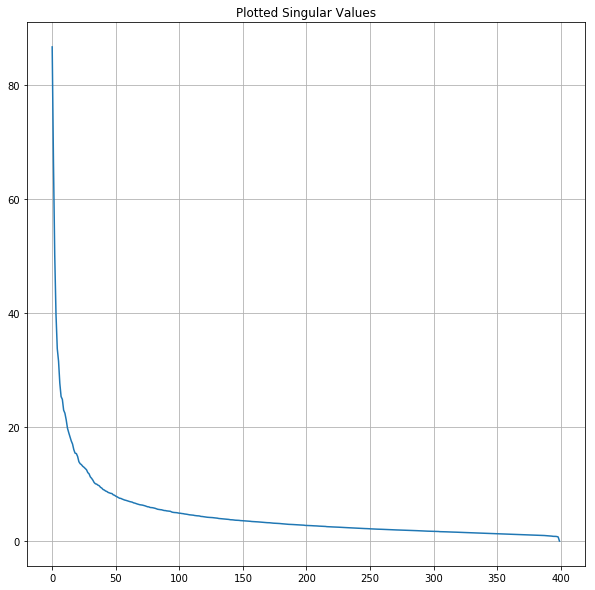

In [47]:
# print first 100 of s and plot the whole
print('First Ten Elements in S: ',s[:10].round(2))
plt.figure(figsize=(10,10))
plt.plot(s)
plt.grid(True)
plt.title('Plotted Singular Values')
plt.show()

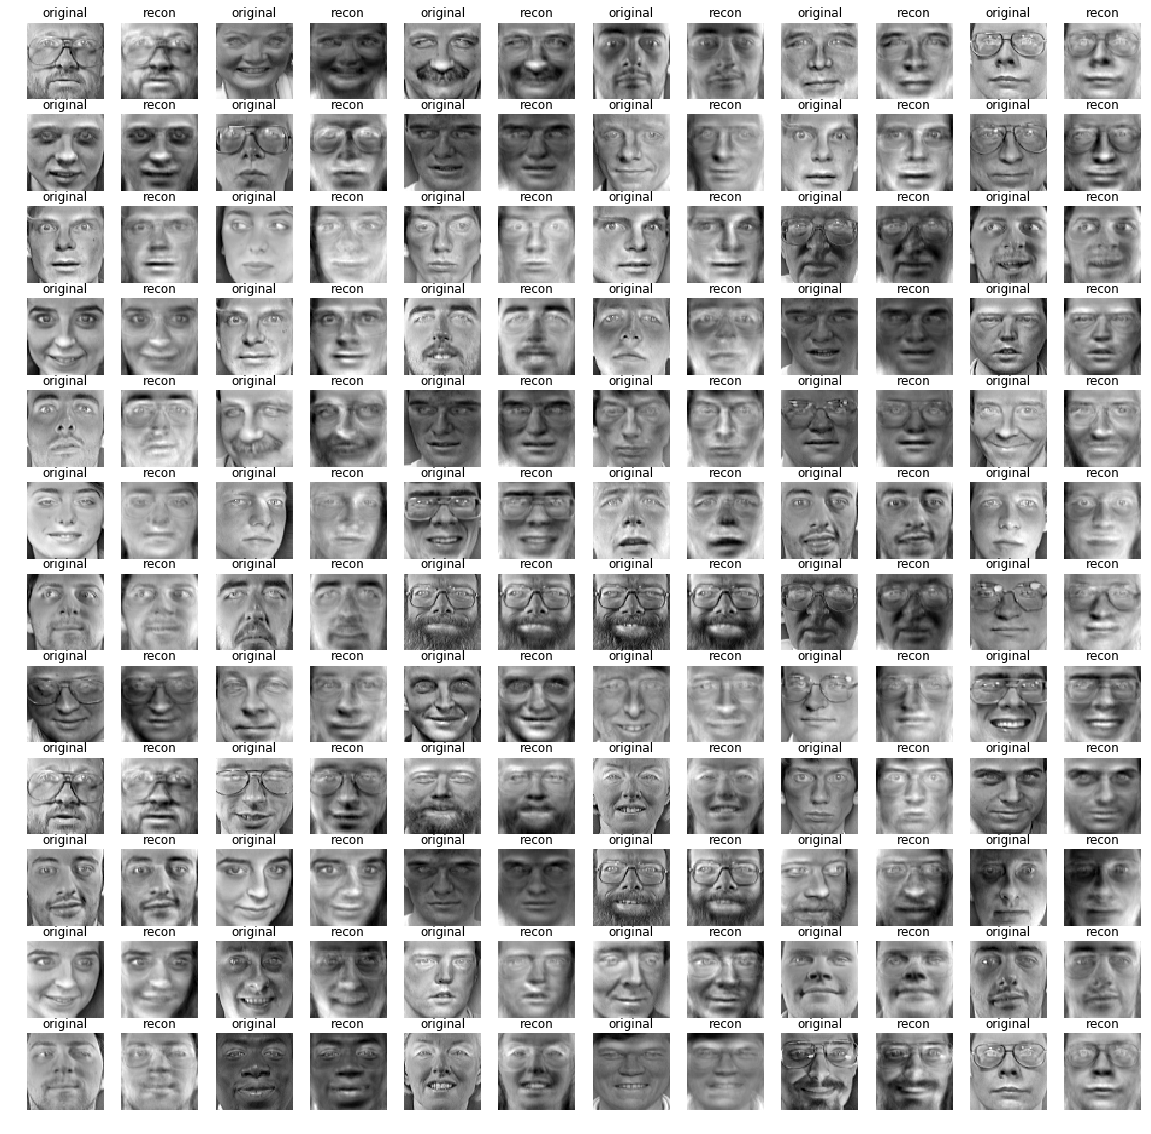

In [50]:
# using only n components
n_components = 50
recon_small = U[:,:n_components] @ np.diag(s[:n_components]) @ V[:n_components,:]
recon_small = recon_small.T
fig=plt.figure(figsize=(20, 20))
columns = 12; rows = 12
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    if i % 2 == 0 :
        plt.title("recon")
        plt.imshow(recon_small[i-2].reshape(64,64),cmap='gray')
    else:
        plt.title("original")
        plt.imshow(normalized_face_data[i-1].reshape(64,64),cmap='gray')
    plt.axis('off')
plt.show()

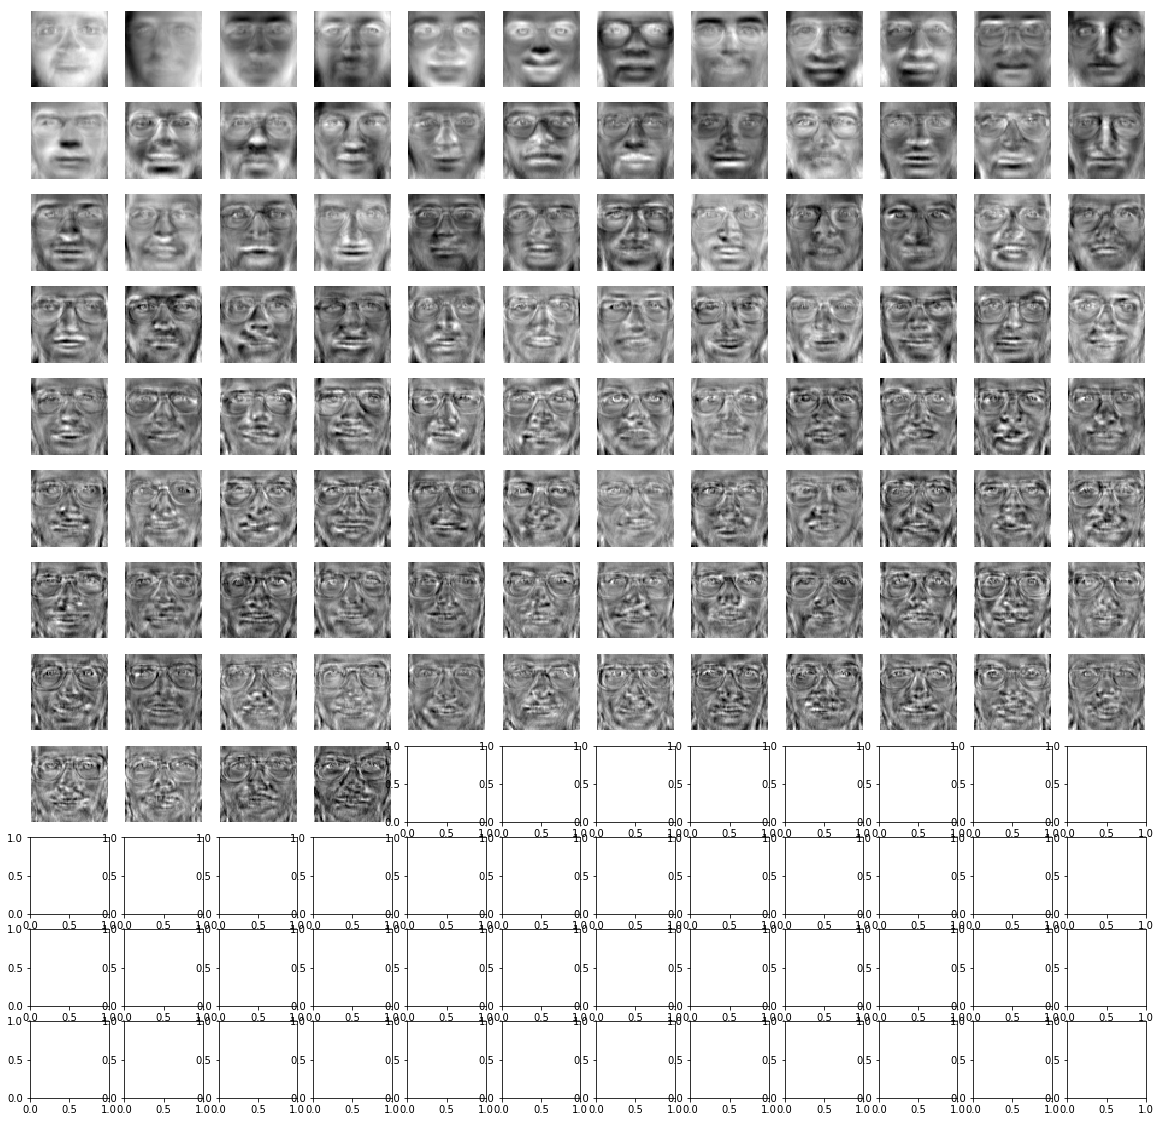

In [55]:
# 100 vectors 
basis_100 = U[:,:100] @ np.diag(s[:100])
basis_100 = basis_100.T
fig=plt.figure(figsize=(20, 20))
columns = 12; rows = 12
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    try:
        plt.imshow(basis_100[i-1].reshape(64,64),cmap='gray')
        plt.axis('off')
    except:
        pass
plt.show()

In [31]:
! git add . && git commit -m "from mac" && git push

[master 0afa7c95] from mac
 1 file changed, 44 insertions(+), 16 deletions(-)
Counting objects: 5, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 981 bytes | 981.00 KiB/s, done.
Total 5 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/JaeDukSeo/Daily-Neural-Network-Practice-2
   e3c5a76c..0afa7c95  master -> master
